In [36]:
#Import functions
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
#Load data

energy = pd.read_csv("/Users/lightpharaoh/Documents/Machine_Learning_Notebooks/AppliancesinEnergyPredictions/energydata_complete.csv")
energy

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [38]:
dates = energy["date"]
dates

0        11-01-2016 17:00
1        11-01-2016 17:10
2        11-01-2016 17:20
3        11-01-2016 17:30
4        11-01-2016 17:40
               ...       
19730    27-05-2016 17:20
19731    27-05-2016 17:30
19732    27-05-2016 17:40
19733    27-05-2016 17:50
19734    27-05-2016 18:00
Name: date, Length: 19735, dtype: object

In [41]:
L = []
for date in dates:
    date = pd.to_datetime(date, dayfirst=True )
    date = pd.to_datetime([date]).view(int) / 10**9
    L.append(date)




timeloops = pd.DataFrame(L, columns=["TIMES"])
timeloops.head()


,TIMES
0,1.452532e+09
1,1.452532e+09
2,1.452533e+09
3,1.452533e+09
4,1.452534e+09


In [47]:
#Drop time
energy_drop_time = energy.drop("date",axis=1)
energy_drop_time

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [53]:
#Add new and improved times
energy_improved = pd.concat([energy_drop_time,timeloops], axis=1)
energy_improved.head()
energy_improved

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TIMES
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433,1.452532e+09
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195,1.452532e+09
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668,1.452533e+09
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390,1.452533e+09
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097,1.452534e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812,1.464370e+09
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940,1.464370e+09
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117,1.464371e+09
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784,1.464371e+09


In [54]:
energy_improved_dummies = pd.get_dummies(energy_improved)
energy_improved_dummies.head()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TIMES
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1.452532e+09
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1.452532e+09
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1.452533e+09
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390,1.452533e+09
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1.452534e+09


In [55]:
#Creating X and y

X = energy_improved_dummies.drop("Appliances", axis=1)
y = energy_improved_dummies["Appliances"]
X, y

(       lights         T1       RH_1         T2       RH_2         T3  \
 0          30  19.890000  47.596667  19.200000  44.790000  19.790000   
 1          30  19.890000  46.693333  19.200000  44.722500  19.790000   
 2          30  19.890000  46.300000  19.200000  44.626667  19.790000   
 3          40  19.890000  46.066667  19.200000  44.590000  19.790000   
 4          40  19.890000  46.333333  19.200000  44.530000  19.790000   
 ...       ...        ...        ...        ...        ...        ...   
 19730       0  25.566667  46.560000  25.890000  42.025714  27.200000   
 19731       0  25.500000  46.500000  25.754000  42.080000  27.133333   
 19732      10  25.500000  46.596667  25.628571  42.768571  27.050000   
 19733      10  25.500000  46.990000  25.414000  43.036000  26.890000   
 19734      10  25.500000  46.600000  25.264286  42.971429  26.823333   
 
             RH_3         T4       RH_4         T5  ...     RH_9  T_out  \
 0      44.730000  19.000000  45.566667  17.166

In [56]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state = 42)
len(X), len(X_train), len(X_test)

(19735, 15788, 3947)

In [78]:
#First model
#Set seed
tf.random.set_seed(74)
#Create model

energy_model_pilot = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


#Compile the model

energy_model_pilot.compile(loss = tf.keras.losses.mae,
                                                optimizer=tf.keras.optimizers.Adam(),
                                                metrics=["mae"])

#Fit the model
energy_model_pilot_final = energy_model_pilot.fit(X_train, y_train, epochs = 100)

Epoch 1/100
494/494 [==============================] - 1s 672us/step - loss: 13348144.0000 - mae: 13348144.0000
Epoch 2/100
494/494 [==============================] - 0s 628us/step - loss: 7327765.5000 - mae: 7327765.5000

In [79]:
energy_model_pilot.evaluate(X_test,y_test)

124/124 [==============================] - 0s 475us/step - loss: 60.1376 - mae: 60.1376


[60.137611389160156, 60.137611389160156]

Text(0.5, 0, 'epochs')

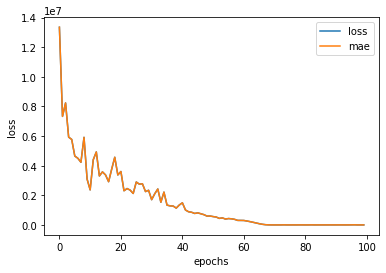

In [80]:
#Plot Graph pilot
pd.DataFrame(energy_model_pilot_final.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


### Decent first model




In [81]:
# Model 2
#Increasing learning rate
#Set seed
tf.random.set_seed(74)
#Create model

energy_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


#Compile the model

energy_model2.compile(loss = tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=.01),
                        metrics=["mae"])

#Fit the model
energy_model2_final = energy_model2.fit(X_train, y_train, epochs = 100)

/Users/lightpharaoh/Documents/Machine_Learning_Notebooks/venv/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
494/494 [==============================] - 1s 691us/step - loss: 21350314.0000 - mae: 21350314.0000
Epoch 2/100
494/494 [==============================] - 0s 636us/step - loss: 1998993.6250 - mae: 1998993.6250

In [82]:
#Evaluate it
energy_model2.evaluate(X_test,y_test)

124/124 [==============================] - 0s 563us/step - loss: 49.5294 - mae: 49.5294


[49.52942657470703, 49.52942657470703]

Text(0.5, 0, 'epochs')

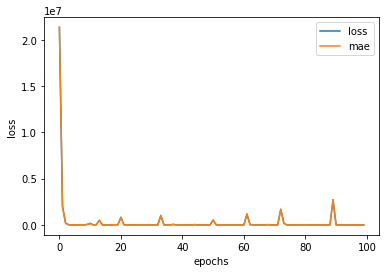

In [83]:
pd.DataFrame(energy_model2_final.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Model 2 is decent and may be best and most natural....


In [84]:
#Model 3
#We will decrease learning rate from original
#Set seed
tf.random.set_seed(74)
#Create model

energy_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


#Compile the model

energy_model3.compile(loss = tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=.0005),
                        metrics=["mae"])

#Fit the model
energy_model3_final = energy_model3.fit(X_train, y_train, epochs = 100)

/Users/lightpharaoh/Documents/Machine_Learning_Notebooks/venv/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
494/494 [==============================] - 1s 639us/step - loss: 12357564.0000 - mae: 12357564.0000
Epoch 2/100
494/494 [==============================] - 0s 611us/step - loss: 3105887.2500 - mae: 3105887.2500

In [85]:
#Evaluate it
energy_model3.evaluate(X_test,y_test)

124/124 [==============================] - 0s 454us/step - loss: 768081.3125 - mae: 768081.3125


[768081.3125, 768081.3125]

Text(0.5, 0, 'epochs')

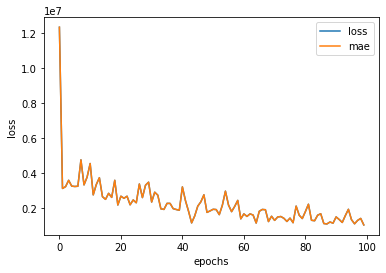

In [86]:
pd.DataFrame(energy_model3_final.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Conclusion model 3 is trash as well... let's try to make NN more complex.


In [93]:
# Model 4
#We will add an extra layer
tf.random.set_seed(74)
#Create model

energy_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


#Compile the model

energy_model4.compile(loss = tf.keras.losses.mae,
                                                optimizer=tf.keras.optimizers.Adam(),
                                                metrics=["mae"])

#Fit the model
energy_model4_final = energy_model4.fit(X_train, y_train, epochs = 100)

Epoch 1/100
494/494 [==============================] - 1s 1ms/step - loss: 38439672.0000 - mae: 38439672.0000

In [94]:
#Evaluate it
energy_model4.evaluate(X_test,y_test)

124/124 [==============================] - 0s 588us/step - loss: 49.7203 - mae: 49.7203


[49.720279693603516, 49.720279693603516]

Text(0.5, 0, 'epochs')

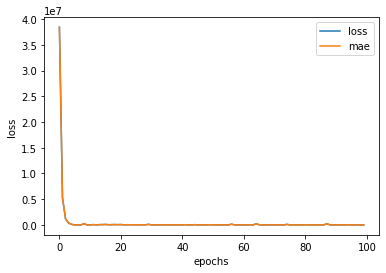

In [95]:
pd.DataFrame(energy_model4_final.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Model 4 Better network produced better results something to think of

In [96]:
#Model #5 will combine things that worked from previous experiments increase learning rate and better network.

tf.random.set_seed(74)
#Create model

energy_model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


#Compile the model

energy_model5.compile(loss = tf.keras.losses.mae,
                                                optimizer=tf.keras.optimizers.Adam(lr=.01),
                                                metrics=["mae"])

#Fit the model
energy_model5_final = energy_model5.fit(X_train, y_train, epochs = 100)

/Users/lightpharaoh/Documents/Machine_Learning_Notebooks/venv/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
494/494 [==============================] - 1s 1ms/step - loss: 55742780.0000 - mae: 55742780.0000

In [97]:
#Evaluate it
energy_model5.evaluate(X_test,y_test)

124/124 [==============================] - 0s 666us/step - loss: 49.3368 - mae: 49.3368


[49.33676528930664, 49.33676528930664]

Text(0.5, 0, 'epochs')

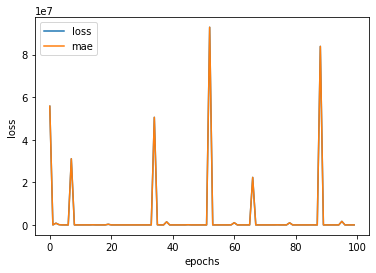

In [98]:
pd.DataFrame(energy_model5_final.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


In [99]:
energy_model2.save("energy2_lrbest")
energy_model2.save("energy2_HDF5_lrbest.h5")

INFO:tensorflow:Assets written to: energy2_lrbest/assets
